<a href="https://colab.research.google.com/github/Mishtert/ML-in-Retail/blob/master/Retail_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Load Libraries**

In [0]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

**Set Plots Style**

In [0]:
f, ax = plt.subplots(figsize=(15, 8))
clr =sns.color_palette("RdBu_r", 7)
sns.set_style('darkgrid')
sns.set_palette(clr)

#**Read Data**

In [0]:
tx_data = pd.read_csv('Retail.csv',encoding = 'unicode_escape')
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**Data Information**

In [0]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188074 entries, 0 to 188073
Data columns (total 8 columns):
InvoiceNo      188074 non-null object
StockCode      188074 non-null object
Description    187311 non-null object
Quantity       188074 non-null int64
InvoiceDate    188074 non-null object
UnitPrice      188074 non-null float64
CustomerID     132166 non-null float64
Country        188074 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 11.5+ MB


In [0]:
tx_data.shape

(188074, 8)

**Convert Invoice Date Column to Date**

In [0]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [0]:
tx_data['InvoiceDate'].describe()

count                  188074
unique                   8566
top       2010-12-06 16:57:00
freq                      675
first     2010-12-01 08:26:00
last      2011-05-12 18:19:00
Name: InvoiceDate, dtype: object

In [0]:
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [0]:
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,201012,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,201012,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,201012,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,201012,54.08


**Create Revenue Column**

In [0]:
tx_data['Revenue'] = tx_data['UnitPrice'] * tx_data['Quantity']

Aggregate revenue by year/month

In [0]:
tx_data.groupby('InvoiceYearMonth')['Revenue'].sum().round(2)

InvoiceYearMonth
201012    748957.02
201101    560000.26
201102    498062.65
201103    683267.08
201104    493207.12
201105    298959.86
Name: Revenue, dtype: float64

In [0]:
tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

Visualize Invoice Over a time period

Text(0.5, 0, 'Year/Month')

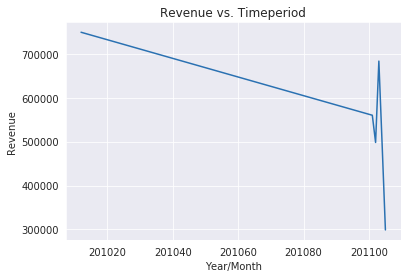

In [0]:
ax = sns.lineplot(x=tx_revenue['InvoiceYearMonth'],
             y=tx_revenue['Revenue'],
             palette = clr)
plt.title("Revenue vs. Timeperiod")
plt.ylabel("Revenue")
plt.xlabel("Year/Month")

Monthly Revenue Growth Rate

In [0]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


plotting growth rate

Text(0.5, 0, 'Year/Month')

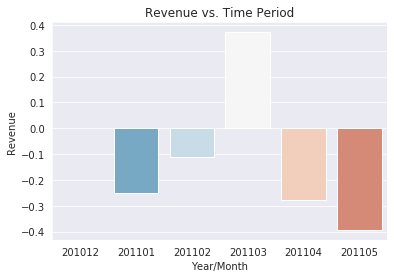

In [0]:
ax = sns.barplot(x=tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
             y=tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'],
             palette = clr)
plt.title("Revenue vs. Time Period")
plt.ylabel("Revenue")
plt.xlabel("Year/Month")

**Monthly Active Customers**

In [0]:
tx_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False).astype(int)

Performing the analysis only on UK customers

In [0]:
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True)
tx_uk.head()

Find monthly active users

In [0]:
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,NaN,NaN
1,0.000443,-0.214696
2,0.000005,0.043860
3,0.000005,0.292717
4,0.000005,-0.114843
5,0.000005,-0.391677


**Visualize Active Customers by TimePeriod**

Text(0.5, 0, 'Year/Month')

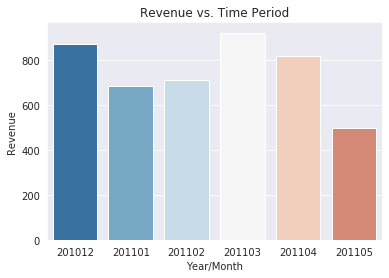

In [0]:
ax = sns.barplot(x=tx_monthly_active['InvoiceYearMonth'],
             y=tx_monthly_active['CustomerID'],
             palette = clr)
plt.title("Revenue vs. Time Period")
plt.ylabel("Revenue")
plt.xlabel("Year/Month")

**Monthly Order Count**

In [0]:
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,122593


Visualize the order count

Text(0.5, 0, 'Year/Month')

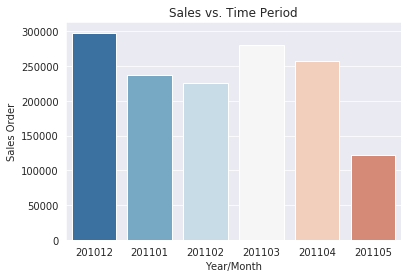

In [0]:
ax = sns.barplot(x=tx_monthly_sales['InvoiceYearMonth'],
             y=tx_monthly_sales['Quantity'],
             palette = clr)
plt.title("Sales vs. Time Period")
plt.ylabel("Sales Order")
plt.xlabel("Year/Month")

Average Monthly Sales

In [0]:
tx_monthly_sales['Quantity'].mean()

236870.83333333334

Oder Average

In [0]:
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,16.203417


Visualize Order Value Overtime

Text(0.5, 0, 'Year/Month')

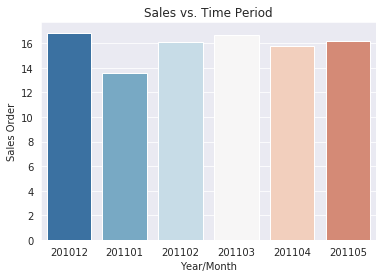

In [0]:
ax = sns.barplot(x=tx_monthly_order_avg['InvoiceYearMonth'],
             y=tx_monthly_order_avg['Revenue'],
             palette = clr)
plt.title("Sales vs. Time Period")
plt.ylabel("Sales Order")
plt.xlabel("Year/Month")

Average Order Value

In [0]:
tx_monthly_order_avg.Revenue.mean()

15.877755112167712

**New Customer Ratio**

First we should define what is a new customer. In our dataset, we can assume a new customer is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example.

In [0]:
tx_uk.info()
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
tx_min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
2374,18272.0,2011-04-07 09:35:00,201104
2375,18273.0,2011-03-27 11:22:00,201103
2376,18277.0,2011-01-25 12:34:00,201101
2377,18280.0,2011-03-07 09:52:00,201103


Merge main Uk dataframe data with min purchase df

In [0]:
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,UserType,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,New,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,New,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012


Create User Type Column

In [0]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

Check number of new and existing users

In [0]:
tx_uk.UserType.value_counts()

New         60768
Existing    57303
Name: UserType, dtype: int64

In [0]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,UserType,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,New,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,New,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012


Find money spent by user type

In [0]:
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

In [0]:
tx_user_type_revenue.head

<bound method NDFrame.head of     InvoiceYearMonth  UserType     Revenue
1             201101  Existing  195275.510
2             201101       New  156705.770
3             201102  Existing  220994.630
4             201102       New  127859.000
5             201103  Existing  296350.030
6             201103       New  160567.840
7             201104  Existing  268226.660
8             201104       New  108517.751
9             201105  Existing  157129.650
10            201105       New   41301.300>

In [0]:
tx_uk.InvoiceYearMonth.value_counts()

201103    24587
201012    24536
201104    21358
201101    18738
201102    18110
201105    10742
Name: InvoiceYearMonth, dtype: int64

Find Revenue by User Type

In [0]:
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

Visualize the spending trend by new and existing users

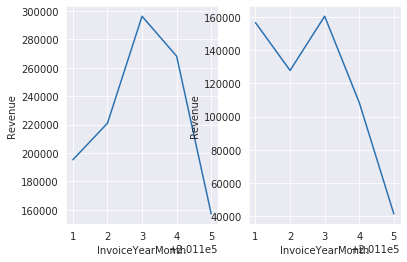

In [0]:
fig, axs = plt.subplots(ncols=2)
sns.lineplot(x=tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        ax=axs[0])
sns.lineplot(x=tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=tx_user_type_revenue.query("UserType == 'New'")['Revenue'],
        ax=axs[1])


Let's look at customer ratio by type

New User Type:

In [0]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

In [0]:
tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
201012    871
201101    362
201102    339
201103    408
201104    276
201105    123
Name: CustomerID, dtype: int64

Existing Customer Type

In [0]:
tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

InvoiceYearMonth
201101    322
201102    375
201103    515
201104    541
201105    374
Name: CustomerID, dtype: int64

Visualize

In [0]:
x=tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'],
y=tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID']

AttributeError: ignored

**Create Signup Data**

In [0]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


Get unique count of singed up customer count

In [0]:
unq_month_year =  tx_min_purchase.MinPurchaseYearMonth.unique()
unq_month_year

array([201101, 201012, 201105, 201102, 201103, 201104])

creating a function to calculate the duration

In [0]:
def generate_signup_date(year_month):
    signup_date = [el for el in unq_month_year if year_month >= el]
    return np.random.choice(signup_date)

In [0]:
tx_min_purchase['SignupYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['MinPurchaseYearMonth']),axis=1)

In [0]:
tx_min_purchase['InstallYearMonth'] = tx_min_purchase.apply(lambda row: generate_signup_date(row['SignupYearMonth']),axis=1)

In [0]:
tx_min_purchase.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth,SignupYearMonth,InstallYearMonth
0,12346.0,2011-01-18 10:01:00,201101,201101,201101
1,12747.0,2010-12-05 15:38:00,201012,201012,201012
2,12748.0,2010-12-01 12:48:00,201012,201012,201012
3,12749.0,2011-05-10 15:25:00,201105,201101,201101
4,12820.0,2011-01-17 12:34:00,201101,201101,201012


In [0]:
tx_min_purchase['AcqChannel'] = tx_min_purchase.apply(lambda x: np.random.choice(channels),axis=1)

NameError: ignored

In [0]:
channels = ['organic','inorganic','referral']

**Activation Rate**

In [0]:

tx_activation = tx_min_purchase[tx_min_purchase['MinPurchaseYearMonth'] == tx_min_purchase['SignupYearMonth']].groupby('SignupYearMonth').CustomerID.count()/tx_min_purchase.groupby('SignupYearMonth').CustomerID.count()
tx_activation = tx_activation.reset_index()

In [0]:
tx_activation_ch = tx_min_purchase[tx_min_purchase['MinPurchaseYearMonth'] == tx_min_purchase['SignupYearMonth']].groupby(['SignupYearMonth','AcqChannel']).CustomerID.count()/tx_min_purchase.groupby(['SignupYearMonth','AcqChannel']).CustomerID.count()
tx_activation_ch = tx_activation_ch.reset_index()

**Monthly Retention Rate**

Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

In [0]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,UserType,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,New,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,New,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,New,2010-12-01 08:26:00,201012


In [0]:
df_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

In [0]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()

In [0]:
tx_user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,442
...,...,...,...
4501,18277.0,201101,-12
4502,18280.0,201103,180
4503,18283.0,201101,214
4504,18283.0,201102,102


In [0]:

tx_user_purchase.Revenue.sum()

2214833

In [0]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

In [0]:
tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105
0,12346.0,0,1,0,0,0,0
1,12747.0,1,1,0,1,0,1
2,12748.0,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1
4,12820.0,0,1,0,0,0,0


In [0]:
months = tx_retention.columns[2:]

In [0]:
months

Index([201101, 201102, 201103, 201104, 201105], dtype='object', name='InvoiceYearMonth')

In [0]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

In [0]:
tx_retention = pd.DataFrame(retention_array)

In [0]:

tx_retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201102,714,263
1,201103,923,305
2,201104,817,310
3,201105,497,190


In [0]:
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

In [0]:
tx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,497,190,0.382294


**Churn Rate**

In [0]:
tx_retention['ChurnRate'] =  1- tx_retention['RetentionRate']

**Cohort Base Retention**

In [0]:
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

In [0]:
tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105
0,12346.0,0,1,0,0,0,0
1,12747.0,1,1,0,1,0,1
2,12748.0,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1
4,12820.0,0,1,0,0,0,0


In [0]:
new_column_names = [ 'm_' + str(column) for column in tx_retention.columns]

In [0]:
tx_retention.columns = new_column_names

In [0]:
months

Index([201101, 201102, 201103, 201104, 201105], dtype='object', name='InvoiceYearMonth')

In [0]:
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = tx_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
    

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

In [0]:
tx_retention = pd.DataFrame(retention_array)

In [0]:
len(months)

5

In [0]:
tx_retention.index = months

In [0]:
tx_retention

,TotalUserCount,201101,201102,201103,201104,201105
InvoiceYearMonth,,,,,,
201101,1.00,1.0,0.38,0.26,0.18,0.10
201102,1.38,NaN,1.00,0.50,0.30,0.15
201103,1.69,NaN,NaN,1.00,0.44,0.20
201104,1.75,NaN,NaN,NaN,1.00,0.33
201105,1.57,NaN,NaN,NaN,NaN,1.00
